# Random Forest Classifiers 
This notebook is an example of how i tested random forest classifiers. 
I used the binding Undersampled data as it gave some of the best results. 

In [1]:
from imports import *


In [2]:
split_path = '../data/binding/splits/'
train_x_df= pd.read_csv(split_path+"bind_train_x_UNDER.csv",header=None)
train_y_df= pd.read_csv(split_path+"bind_train_y_UNDER.csv",header=None)
test_x_df = pd.read_csv(split_path+"bind_test_x_UNDER.csv",header=None)
test_y_df = pd.read_csv(split_path+"bind_test_y_UNDER.csv",header=None)

train_x = train_x_df.values
train_y = train_y_df.values.reshape(-1)  
test_x = test_x_df.values
test_y = test_y_df.values.reshape(-1)  

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((90, 306), (90,), (283, 306), (283,))

In [3]:
# Default Random Forest 

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.647, precision: 0.051, recall: 0.417, specificity: 0.657


<Figure size 600x400 with 0 Axes>

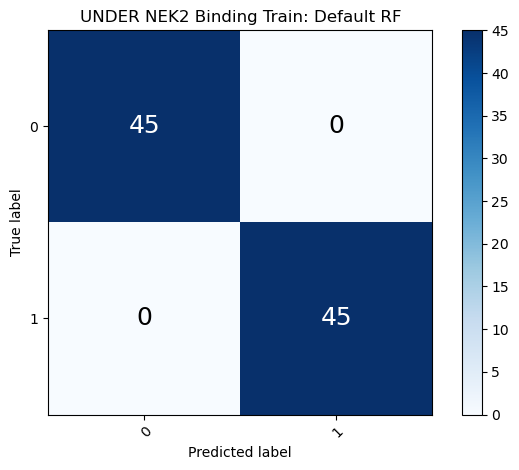

<Figure size 600x400 with 0 Axes>

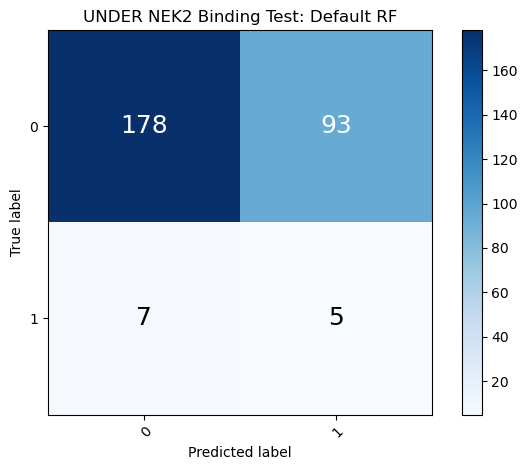

In [4]:
default_rf = rf_models(train_x, train_y, test_x, test_y, 'basic RF', {})
plot_confusion_matrix(train_y, default_rf['train_pred'], ['0','1'], title='UNDER NEK2 Binding Train: Default RF')
plot_confusion_matrix(test_y, default_rf['test_pred'], ['0','1'], title='UNDER NEK2 Binding Test: Default RF')

# Hyperparameter Tuning
Model improvements were done through hyperparameter searches Cross Validation grid search. 

In [5]:
# search grid for hyperparameter opt
param_grid = {
    'n_estimators': np.linspace(100, 2000, 3, dtype = int),
    'max_depth': [20, 100, 200, 220],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 5],
    'criterion': ['gini','entropy']
}

TRAIN: accuracy: 0.744, precision: 0.667, recall: 0.978, specificity: 0.511
TEST: accuracy: 0.657, precision: 0.079, recall: 0.667, specificity: 0.657


/Users/jayceepang/miniconda3/envs/nek2_final/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/nek2_final/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


<Figure size 600x400 with 0 Axes>

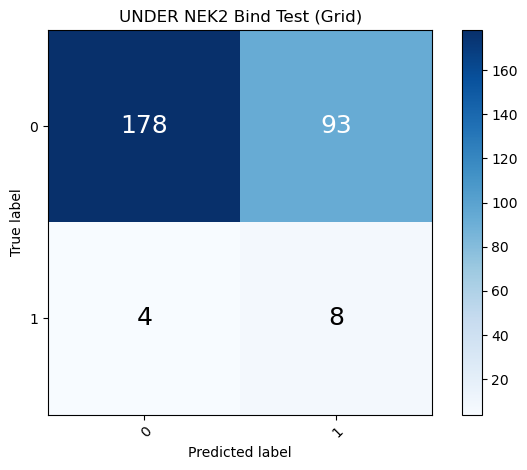

In [6]:
# to run the grid search: 
save_file = 'bind_rf_grid.pkl' 
model_dir = '../models/'
# run the search by passing in the type of model: 'basic RF' adn any parameters, and the grid 
# 2 is the verbose value for the print statements during the grid search 
# grid_model = find_best_models(train_x, train_y, test_x, test_y, 'basic RF', {}, param_grid, 2)
# with open(model_dir+save_file, 'wb') as f:
#     pickle.dump(grid_model['best_model'], f)

with open(model_dir+save_file, 'rb') as f: 
    grid_model = pickle.load(f) 

gridresults = rf_results2(grid_model, train_x, train_y, test_x, test_y)
plot_confusion_matrix(test_y, gridresults['test_pred'], ['0','1'], title='UNDER NEK2 Bind Test (Grid)')

We now see some improvements after the grid search. Let's compare the params.

In [7]:
for (param_grid, grid_value), (param_default, default_value) in zip(grid_model.get_params().items(), default_rf['model'].get_params().items()):
    print(f'{param_default}: {default_value}')
    print(f'{param_grid}: {grid_value}')


bootstrap: False
bootstrap: False
ccp_alpha: 0.0
ccp_alpha: 0.0
class_weight: None
class_weight: None
criterion: gini
criterion: gini
max_depth: 100
max_depth: 20
max_features: None
max_features: None
max_leaf_nodes: None
max_leaf_nodes: None
max_samples: None
max_samples: None
min_impurity_decrease: 0.0
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_leaf: 2
min_samples_split: 2
min_samples_split: 4
min_weight_fraction_leaf: 0.0
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_estimators: 100
n_jobs: None
n_jobs: None
oob_score: False
oob_score: False
random_state: None
random_state: None
verbose: 0
verbose: 0
warm_start: False
warm_start: False


I also tested the following 3 model types. 
- Adding balanced class weights to the BalancedRandomForestClassifier
- BalancedRandomForestClassifier
- BalancedRandomForestClassifier with balanced class weight
- all models were tuned with the grid search with the grid above 

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.647, precision: 0.051, recall: 0.417, specificity: 0.657


<Figure size 600x400 with 0 Axes>

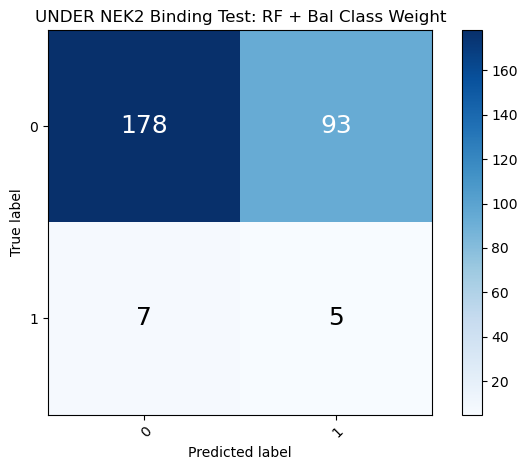

In [8]:
balCW = rf_models(train_x, train_y, test_x, test_y, 'balanced class_weight', {})
# plot_confusion_matrix(train_y, balCW['train_pred'], ['0','1'], title='UNDER NEK2 Binding Train: RF + Bal Class Weight')
plot_confusion_matrix(test_y, balCW['test_pred'], ['0','1'], title='UNDER NEK2 Binding Test: RF + Bal Class Weight')

/Users/jayceepang/miniconda3/envs/nek2_final/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/nek2_final/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.636, precision: 0.050, recall: 0.417, specificity: 0.646


<Figure size 600x400 with 0 Axes>

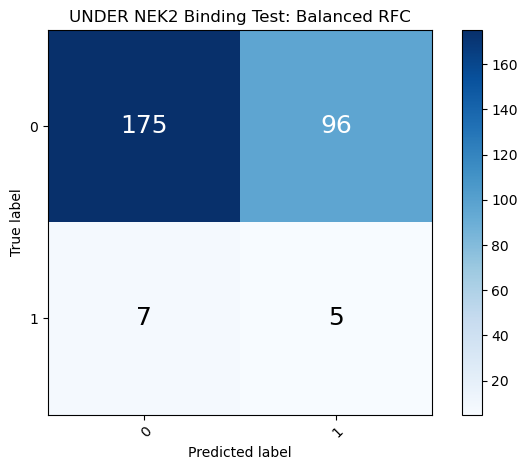

In [9]:
brfc = rf_models(train_x, train_y, test_x, test_y, 'balanced RF', {})
# plot_confusion_matrix(train_y, brfc['train_pred'], ['0','1'], title='UNDER NEK2 Binding Train: Balanced RFC')
plot_confusion_matrix(test_y,brfc['test_pred'], ['0','1'], title='UNDER NEK2 Binding Test: Balanced RFC')

/Users/jayceepang/miniconda3/envs/nek2_final/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/nek2_final/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.643, precision: 0.051, recall: 0.417, specificity: 0.653


<Figure size 600x400 with 0 Axes>

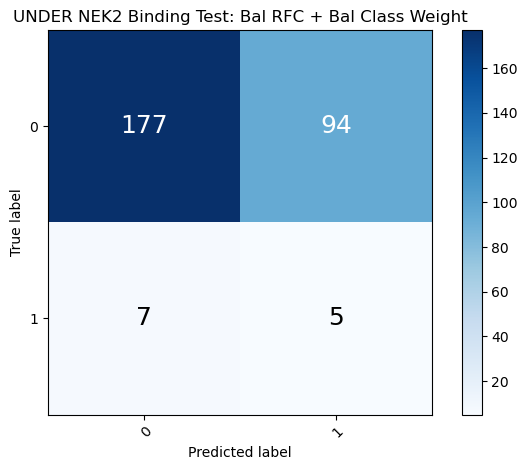

In [10]:
# add balanced class weight 
brfc_bcw = rf_models(train_x, train_y, test_x, test_y, 'balanced RF', {'class_weight':'balanced'})
# plot_confusion_matrix(train_y, brfc_bcw['train_pred'], ['0','1'], title='UNDER NEK2 Binding Train: Bal RFC + Bal Class Weight')
plot_confusion_matrix(test_y, brfc_bcw['test_pred'], ['0','1'], title='UNDER NEK2 Binding Test: Bal RFC + Bal Class Weight')

# Probabilities 
- Looking at probability and Z-score ADI for uncertainty quantification

/Users/jayceepang/miniconda3/envs/nek2_final/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/nek2_final/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/nek2_final/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/nek2_final/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

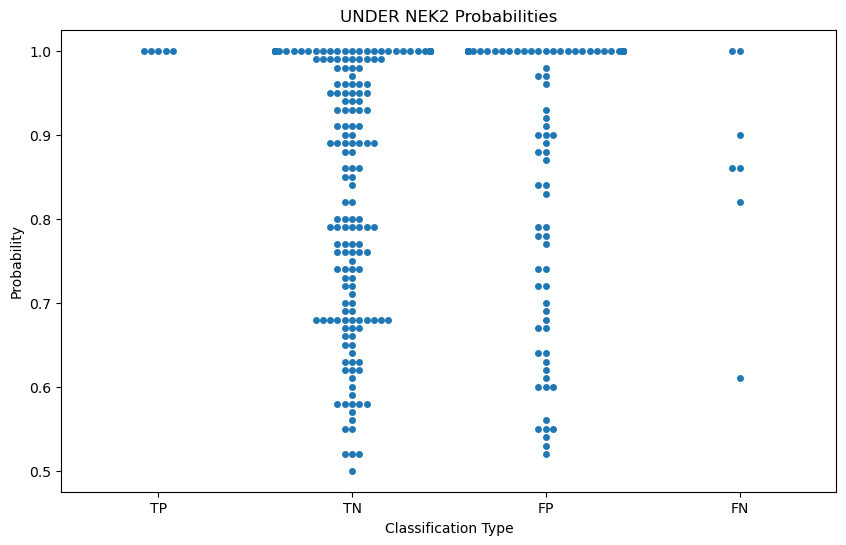

In [11]:
swarm_prob(brfc_bcw['model'], test_x, test_y, 'UNDER NEK2 Probabilities')

The probabilities don't look that great, as the variances are not distinctive across true and false predictions. 

# Z-score ADI 
Let's look at the relationship of the correct and incorrect predictions and their Z-score ADI. This metric encodes the distance of a test point's distance from the training data. It is interpreted as how the model predicts on data far from the training distribution. Larger Z-score ADI means that prediction is far from the trainnig data. 

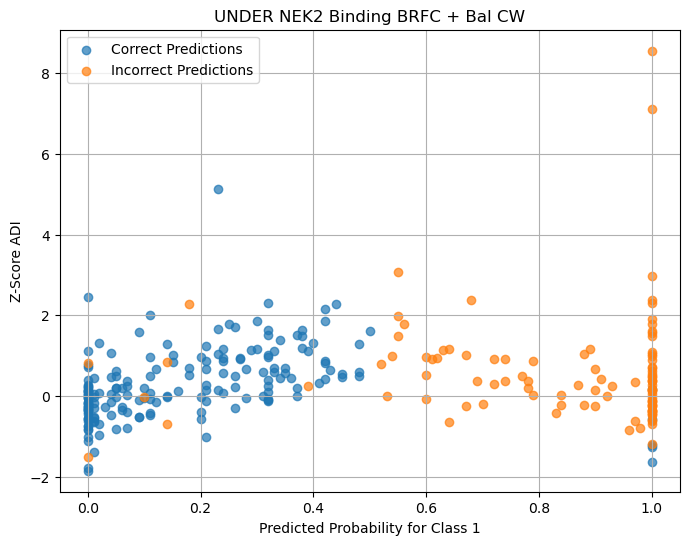

In [13]:
k = 5
model = brfc_bcw['model']
probabilities0 = model.predict_proba(test_x)[:, 0]
probabilities1 = model.predict_proba(test_x)[:, 1]

adi_zscores = zscore_adi(train_x, test_x, k)
predictions = model.predict(test_x)
correct_pred = (predictions == test_y)

adi_zscores = np.array(adi_zscores)

plt.figure(figsize=(8, 6))
plt.scatter(probabilities1[correct_pred], adi_zscores[correct_pred], label='Correct Predictions', alpha=0.7)
plt.scatter(probabilities1[~correct_pred], adi_zscores[~correct_pred], label='Incorrect Predictions',  alpha=0.7)
plt.xlabel('Predicted Probability for Class 1')
plt.ylabel('Z-Score ADI')
plt.title('UNDER NEK2 Binding BRFC + Bal CW')
plt.legend()
plt.grid(True)
plt.show()